In [32]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/curated/outliers_removed.csv')
data.head()

,Unnamed: 0,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Weekly Rental Price
0,5,3000,1,34652.148872,4.0,45.0,1,440.0
1,6,3000,1,34652.148872,4.0,45.0,1,440.0
2,7,3000,1,34652.148872,4.0,45.0,1,440.0
3,8,3000,1,34652.148872,4.0,45.0,1,440.0
4,9,3000,1,34652.148872,4.0,45.0,1,440.0


In [3]:
x_train = data[['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms']]
y_train = data['Weekly Rental Price']

In [5]:
from sklearn.model_selection import train_test_split

# split the data into two groups that are training set and the testing set
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.3, shuffle=True)

In [25]:
model = xgb.XGBRegressor(max_depth=50, learning_rate=0.5, n_estimators=100)
model.fit(x_train_split, y_train_split)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [26]:
predictions = model.predict(x_test_split)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mae=mean_absolute_error(predictions,y_test_split)
mse=mean_squared_error(predictions,y_test_split)
mae,mse

(46.45579384232319, 4323.090592731084)

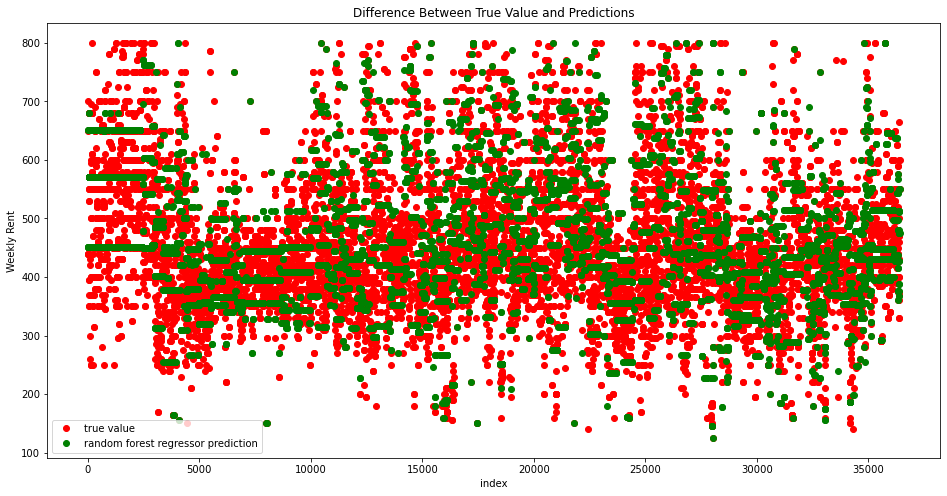

In [30]:
# plot the predictions of the random forest regressor and the true value
plt.figure(figsize=(16,8))
plt.title('Result Analysis')
plt.plot(x_test_split.index, y_test_split,'o',color = 'red',label = 'true value')
plt.plot(x_test_split.index, predictions,'o', color = 'green',label = 'random forest regressor prediction')

plt.legend()
plt.xlabel('index')
plt.ylabel('Weekly Rent')
plt.title('Difference Between True Value and Predictions')

# save the histogram
# plt.savefig('../plots/result_analysis')

plt.show()

In [34]:
from statistics import mode

# calculate the absolute errors of baseline model
y_mode = mode(y_test_split)
baseline_error = [abs(y_mode-x) for x in y_test_split]
np.mean(baseline_error)

92.40234389969007

In [35]:
population = pd.read_csv('../data/curated/predicted_population.csv')
population.head()

,Unnamed: 0,Postcode,2021,2022,2023,2024,2025
0,0,3000,29606.0,34652.148872,34971.418045,35245.061613,35473.079574
1,1,3002,4962.0,5061.845113,4939.852221,4800.901055,4644.991613
2,2,3004,27527.0,29085.787970,29126.361312,29134.868531,29111.309626
3,3,3005,15942.0,19000.428571,20361.246753,21767.776962,23220.019198
4,4,3008,15942.0,19000.428571,20361.246753,21767.776962,23220.019198


In [36]:
pop_2023 = population[['Postcode','2023']]
pop_2024 = population[['Postcode','2024']]
pop_2025 = population[['Postcode','2025']]

In [37]:
pop_2023 = pd.merge(pop_2023, data, how='inner', on=['Postcode'])
pop_2023 =pop_2023.drop(labels=['Population'],axis=1) 
pop_2023 = pop_2023[['Postcode', 'Baths', '2023', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2023 = pop_2023.rename(columns={'2023' : 'Population'})
pop_2023

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms
0,3000,1,34971.418045,4.0,45.0,1
1,3000,1,34971.418045,4.0,45.0,1
2,3000,1,34971.418045,4.0,45.0,1
3,3000,1,34971.418045,4.0,45.0,1
4,3000,1,34971.418045,4.0,45.0,1
...,...,...,...,...,...,...
36395,3996,1,37948.158442,0.0,0.0,2
36396,3996,1,37948.158442,0.0,0.0,2
36397,3996,1,37948.158442,0.0,0.0,2
36398,3996,2,37948.158442,0.0,0.0,3


In [38]:
pop_2024 = pd.merge(pop_2024, data, how='inner', on=['Postcode'])
pop_2024 =pop_2024.drop(labels=['Population'],axis=1) 
pop_2024 = pop_2024[['Postcode', 'Baths', '2024', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2024 = pop_2024.rename(columns={'2024' : 'Population'})

pop_2024

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms
0,3000,1,35245.061613,4.0,45.0,1
1,3000,1,35245.061613,4.0,45.0,1
2,3000,1,35245.061613,4.0,45.0,1
3,3000,1,35245.061613,4.0,45.0,1
4,3000,1,35245.061613,4.0,45.0,1
...,...,...,...,...,...,...
36395,3996,1,39055.632072,0.0,0.0,2
36396,3996,1,39055.632072,0.0,0.0,2
36397,3996,1,39055.632072,0.0,0.0,2
36398,3996,2,39055.632072,0.0,0.0,3


In [39]:
pop_2025 = pd.merge(pop_2025, data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'],axis=1) 
pop_2025 = pop_2025[['Postcode', 'Baths', '2025', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2025 = pop_2025.rename(columns={'2025' : 'Population'})
pop_2025

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms
0,3000,1,35473.079574,4.0,45.0,1
1,3000,1,35473.079574,4.0,45.0,1
2,3000,1,35473.079574,4.0,45.0,1
3,3000,1,35473.079574,4.0,45.0,1
4,3000,1,35473.079574,4.0,45.0,1
...,...,...,...,...,...,...
36395,3996,1,40212.078035,0.0,0.0,2
36396,3996,1,40212.078035,0.0,0.0,2
36397,3996,1,40212.078035,0.0,0.0,2
36398,3996,2,40212.078035,0.0,0.0,3


In [40]:
pred_2023 = model.predict(pop_2023)
pred_2024 = model.predict(pop_2024)
pred_2025 = model.predict(pop_2025)

In [41]:
data.insert(8, 'Pred_2023', pred_2023)
data.insert(9, 'Pred_2024', pred_2024)
data.insert(10, 'Pred_2025', pred_2025)

data = data[['Postcode','Baths','Population','Count_School','Count_Station','Weekly Rental Price','Pred_2023','Pred_2024','Pred_2025']]
data

,Postcode,Baths,Population,Count_School,Count_Station,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025
0,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402
1,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402
2,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402
3,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402
4,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402
...,...,...,...,...,...,...,...,...,...
36395,3996,1,36889.657143,0.0,0.0,420.0,383.030731,383.030731,383.063568
36396,3996,1,36889.657143,0.0,0.0,370.0,383.030731,383.030731,383.063568
36397,3996,1,36889.657143,0.0,0.0,370.0,383.030731,383.030731,383.063568
36398,3996,2,36889.657143,0.0,0.0,475.0,511.279907,511.279907,511.279907


In [42]:
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price'])/data['Weekly Rental Price']
data['rate_2024'] = (data['Pred_2024'] - data['Weekly Rental Price'])/data['Weekly Rental Price']
data['rate_2025'] = (data['Pred_2025'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

data

,Postcode,Baths,Population,Count_School,Count_Station,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025,rate_2023,rate_2024,rate_2025
0,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402,0.009287,0.009287,0.009290
1,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402,0.009287,0.009287,0.009290
2,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402,0.009287,0.009287,0.009290
3,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402,0.009287,0.009287,0.009290
4,3000,1,34652.148872,4.0,45.0,440.0,444.086273,444.086273,444.087402,0.009287,0.009287,0.009290
...,...,...,...,...,...,...,...,...,...,...,...,...
36395,3996,1,36889.657143,0.0,0.0,420.0,383.030731,383.030731,383.063568,-0.088022,-0.088022,-0.087944
36396,3996,1,36889.657143,0.0,0.0,370.0,383.030731,383.030731,383.063568,0.035218,0.035218,0.035307
36397,3996,1,36889.657143,0.0,0.0,370.0,383.030731,383.030731,383.063568,0.035218,0.035218,0.035307
36398,3996,2,36889.657143,0.0,0.0,475.0,511.279907,511.279907,511.279907,0.076379,0.076379,0.076379


In [43]:
data.to_csv("../data/curated/Xg_boost_predi.csv")